# Transmiss√£o de Energia Sem Fio (WPT)

Eletromagnetismo e Ondulat√≥ria - Engenharia da Computa√ß√£o 

Professor : Carlos Marmo

Grupo:
- Ana Laiz Farias
- Jo√£o Ant√¥nio
- Pedro Lacerda
- Ananda Campelo

# Etapa 1 - Parte 1

### Diagrama do modelo eletrodin√¢mico do circuito WPT

<div style="text-align:center">
    <img src="img/circuito_esquematico.png" width="1000" />
</div>


# Etapa 1 - Parte 2

#### Importando bibliotecas utilizadas no projeto

In [5]:
from cmath import *
from numpy import linalg, round
import numpy as np
import matplotlib.pyplot as plt
import math 

#### Definindo par√¢metros para os c√°lculos:

Com base nas medi√ß√µes feitas em laborat√≥rio, obtemos os par√¢metros de cada uma das bobinas listadas abaixo

<img src="img/b1.jpg" width="400"/> | <img src="img/b2.jpg" width="400"/>
:-------------------------:|:-------------------------:


In [6]:
R_1 = 1.884
R_2 = 1.883
R_C = 220

# Por design do circuito, assume-se valores para L1 e C1 e sup√µe-se que C2 e L2 ser√£o iguais a suas contrapartidas do circuito prim√©rio.
L_1 = 614.7 * 10**(-6)
L_2 = 650.9 * 10**(-6)

C_1 = 0.1 * 10**(-6)
C_2 = C_1

# V1 padr√£o para a simula√ß√£o e testagem
V_1 = 9

#A frequencia de ressonancia
w_ref = 1 / math.sqrt(((L_1)) * C_1)
f_ref = w_ref / (2*np.pi)

print(f'A frequ√™ncia de resson√¢ncia do circuito √© {round(abs(f_ref))}')

A frequ√™ncia de resson√¢ncia do circuito √© 20300.0


## Etapa 1 - Parte 3

#### A fun√ß√£o "resultados" devolve os valores de $ I_1 , I_2, I_C , V_2 $ 

<div style="text-align:center">
    <img src="img/malhas.png" width="1000" />
</div>


##### Fazendo os calculos da malha 2: 

$$ Z_{eq} = \frac{\frac{1}{j\omega{C}_{2}}R_{C}}{\frac{1}{j\omega{C}_{2}}+R_{C}} = \frac{R_{C}}{j\omega{R}_{C}{C}_{2} +1} $$

$$ j\omega M\hat{I}_{1} =  j\omega{L}_{2}\hat{I}_{2} + R_{2}\hat{I}_{2} + Z_{eq}\hat{I}_{2}$$

##### Fazendo os calculos da malha 1:

$$ \hat{V}_{f} = R_{1}\hat{I}_{1} + j\omega{L}_{1}\hat{I}_{1} + \frac{1}{j\omega{C}_{1}}\hat{I}_{1} - j\omega M\hat{I}_{2} $$

##### Matriz a ser resolvida

$$\begin{bmatrix} {R}_{1} + j\omega{L}_{1} + \frac{1}{j\omega{C}_{1}} & - j\omega M  \\ - j\omega M & j\omega{L}_{2} + R_{2} + Z_{eq}   \end{bmatrix} \begin{bmatrix} \hat{I}_{1} \\ \hat{I}_{2}  \end{bmatrix} = \begin{bmatrix} \hat{V}_{f} \\ 0  \end{bmatrix}$$

##### Circuito Montado na protoboard

<p align="center">
  <img src="img/circuitos.jpg" alt="Circuito">
</p>


##### A fun√ß√£o "resultados" foi estabelecida para resolver o circuito, levando em considera√ß√£o uma frequ√™ncia de resson√¢ncia e um coeficiente de acoplamento como par√¢metros essenciais. Essas vari√°veis foram definidas com o prop√≥sito de simplificar a aplica√ß√£o da fun√ß√£o nas diversas an√°lises da etapa 1. Importante observar que, de forma padr√£o, as vari√°veis est√£o configuradas para os valores utilizados na simula√ß√£o inicial.

In [7]:
def parametros(w, k, Uf = V_1, RC = R_C, R1 = R_1, R2 = R_2, L1 = L_1, L2=L_2, C1=C_1, C2=C_2):

    '''para a malha 1, considerando Z = R + jX'''
    X_L1 = 1j*w*L1
    X_C1 = 1/(1j*w*C1)

    #Calculando a imped√¢ncia equivalente da malha 1
    Z_eq1 = R1 + X_L1 + X_C1

    '''Para a malha 2, considerando Z = R + jX'''
    X_L2 = 1j*w*L2
    X_C2 = 1/(1j*w*C2)

    #calculando imped√¢ncia equivalente entre o capacitor(C2) e o resistor (RC)
    Z_cr = ( RC* X_C2) / ( RC+ X_C2) 
    # Agora calculando a imped√¢ncia equivalente da malha 2 inteira 
    Z_eq2 = R2 + X_L2 + Z_cr 

    ''' Agora, fazendo o Calculo de M e da sua imped√¢ncia'''
    M = k*math.sqrt(L1*L2)
    X_M = 1j*w*M

    Z = np.array([[Z_eq1, -X_M],[-X_M,  Z_eq2]])
    V = np.array([V_1, 0])

    #Com base nisso podemos calcular as corrente 
    I1,I2 = np.dot(linalg.inv(Z), V)
    V2 = Z_cr * I2
    IC = V2 / RC

    return I1,I2,V2,IC

##### Posteriormente, plotaremos o gr√°fico da corrente $I_1, I_2$ em rela√ß√£o √† frequ√™ncia, com o objetivo de identificar a frequ√™ncia mais apropriada por meio da an√°lise visual do comportamento da corrente em fun√ß√£o da frequ√™ncia. Al√©m disso, poderemos observar como a corrente em um circuito RC (ou seja, $V_2$) varia com as mudan√ßas na frequ√™ncia, considerando os componentes especificados.






### Gr√°ficos das Correntes $ I_1 , I_2 $ x Frequ√™ncia

Corrente no prim√°rio m√°xima 2.36121266287573
Corrente no secud√°rio m√°xima 0.6383947336868347


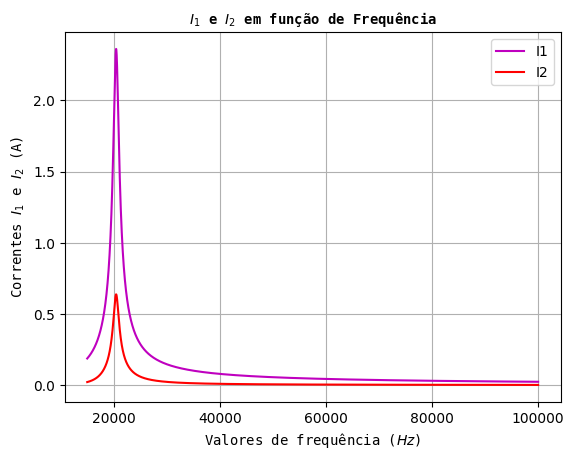

Frequ√™ncia para corrente m√°xima √©: 20449.04490449045


In [8]:
lista_frequencias = np.linspace(15000,100000,10000)
I1_params = []
I2_params = []
for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2, _, _ = parametros(w,0.1) # k = 0.1
    I1_params.append(abs(I1))
    I2_params.append(abs(I2))


I2max = max(I2_params)

print('Corrente no prim√°rio m√°xima',max(I1_params))
print('Corrente no secud√°rio m√°xima',max(I2_params))
#Descobre a respectiva frequ√™ncia para corrente m√°xima
f_max= lista_frequencias[I2_params.index(I2max)]

plt.plot(lista_frequencias,I1_params,'m',label = ("I1"))
plt.plot(lista_frequencias,I2_params,'r',label = ("I2"))
plt.xlabel("Valores de frequ√™ncia ($Hz$)",fontsize=10,fontfamily = 'monospace')
plt.ylabel("Correntes $I_1$ e $I_2$ (A)",fontsize=10,fontfamily = 'monospace')
plt.title("$I_1$ e $I_2$ em fun√ß√£o de Frequ√™ncia",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()

print('Frequ√™ncia para corrente m√°xima √©: {}'.format(f_max))

##### Observa-se que a frequ√™ncia de resson√¢ncia calculada antes bate bem pr√≥xima da frequ√™ncia com o pico de tens√£o¬†no¬†gr√°fico. Agora, iremos analisar a frequ√™ncia de pico variando com o coefici√™nte de acoplamento, mantendo os mesmos componentes.

- A frequ√™ncia para a qual as correntes s√£o m√°ximas √© coincidente com a frequ√™ncia de resson√¢ncia que foi obtida na parte 1.

- k = fator de acoplamento (constante) = medida da quantidade de acoplamento entre duas bobinas ou indutores em um circuito

- Indica a efici√™ncia com que a energia magn√©tica √© transferida de uma bobina para outra. Varia entre 0 e 1.

- Um fator de acoplamento de 1 indica um acoplamento perfeito, onde toda a energia magn√©tica gerada por uma bobina √© transferida para a outra bobina. Um fator de acoplamento de 0 indica um acoplamento nulo, onde n√£o h√° transfer√™ncia de energia entre as bobinas.

- O fator de acoplamento pode ser calculado usando a f√≥rmula:

- $k = \frac{M}{\sqrt{L1 \cdot L2}}$

- A indut√¢ncia m√∫tua (M) √© uma medida da intera√ß√£o magn√©tica entre as bobinas e depende da geometria e posicionamento das bobinas no circuito. Quanto maior a indut√¢ncia m√∫tua, maior ser√° o acoplamento entre as bobinas e, portanto, maior ser√° o fator de acoplamento. A medida em que k varia, a amplitude do gr√°fico muda. 

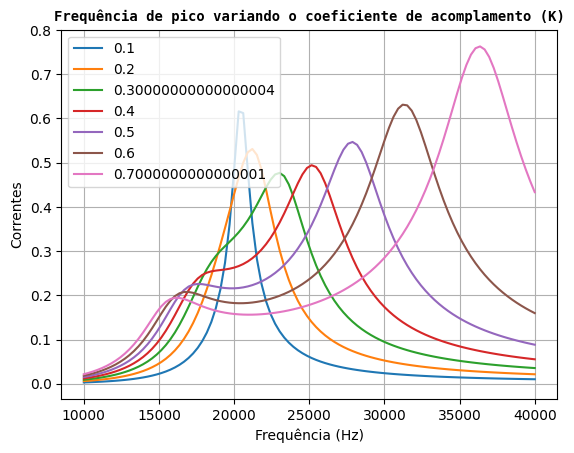

In [9]:
lista_I2 = []
k = np.arange(0.1, 0.8, 0.1)
lista_f = np.linspace(10e3, 40e3, 100)

for i in range(len(k)):
  
  lista_I2.append([])
  for f in lista_f:
    w = 2*math.pi*f
    lista_I2[i].append(parametros(w,k[i])[1])

  
  plt.plot(lista_f, np.abs(lista_I2[i]), label = (k[i]))

plt.xlabel("Frequ√™ncia (Hz)")
plt.ylabel("Correntes")
plt.title("Frequ√™ncia de pico variando o coeficiente de acomplamento (K)",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()


## Etapa 1 - Parte 4

#### Nessa etapa, √© poss√≠vel analisar o comportamento do circuito para 6 indut√¢ncias diferentes, variando tamb√©m os valores de frequ√™ncia, e assumindo uma Capacit√¢ncia de forma que tal frequ√™ncia seja a frequ√™ncia de resson√¢ncia.

- Considere : 
                    $$ C = \frac{1}{4 . Pi . 2 . f^2 . L}$$


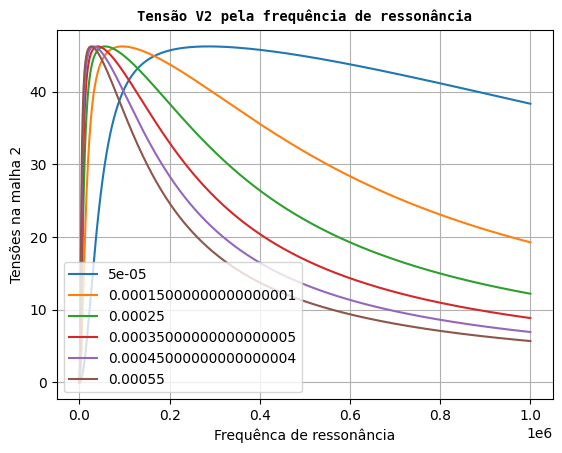

In [10]:
list_L = np.linspace(50e-6,550e-6,6) #lista de indut√¢ncias
l_fres = np.linspace(10, 10e5, 1000) #lista de frequ√™ncias de resson√¢ncia indo de 10kHz at√© 100KHz

k = 0.1

for L in list_L:

    l_V2 = []
    for f in l_fres:
        C = 1 / (4*L*(np.pi*f)**2) # Capacit√¢ncia dada a frequ√™ncia de resson√¢ncia e Indut√¢ncia do circuito
        
        I1, I2, V2, _ = parametros(L1 = L,L2=L,C1=C,C2=C,w=(f*2*np.pi),k=0.1) #correntes
        l_V2.append(abs(V2))
        
    
    
    plt.plot(l_fres, l_V2, label = L)
    plt.xlabel("Frequ√™nca de resson√¢ncia")
    plt.ylabel("Tens√µes na malha 2")
plt.title("Tens√£o V2 pela frequ√™ncia de resson√¢ncia",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()

## Etapa 1 - Parte 5

#### Nessa etapa, ser√° observado como a transfer√™ncia de energia √© m√°xima, plota-se o gr√°fico da pot√™ncia de entrada e de sa√≠da pela frequ√™ncia da fonte. Al√©m da pot√™ncia, √© muito importante analisar a efici√™ncia (rendimento) do circuito.

- Para constru√ß√£o deste gr√°fico foi feito uma lista de frequ√™ncias entre 10kHz e 50kHz, e para cada frequ√™ncia foi calculado a pot√™ncia atrav√©s da formula: 

$$ P = \frac {V2} {\frac {\sqrt{2} . I1} {\sqrt{2}} } $$

- Ap√≥s isso foi calculado o $\omega$ (velocidade angular) atrav√©s da formula:

$$ \omega = 2 . Pi . f $$

- Com isso foi possivel calcular a impedancia do circuito atrav√©s da formula:

$$ Z = \frac {\frac{1}{j . \omega . C} . Rc} {Rc + \frac{1}{j . \omega . C} } $$

- Ap√≥s foi calculado o valor da tens√£o V de carga atrav√©s da formula:

$$ Vc = I2 . Z $$

- Ao fim disso foi calculado a pot√™ncia de carga atrav√©s da formula:

$$ P = \frac {Vc} {\frac {\sqrt{2} . I2} {\sqrt{2}} } $$


Pot√™ncia de entrada 10.624537599844201
Pot√™ncia de sa√≠da 4.989959552581975
Variando a frequ√™ncia, a pot√™ncia m√°xima de sa√≠da √©  f = 20435.30435304353 Hz.


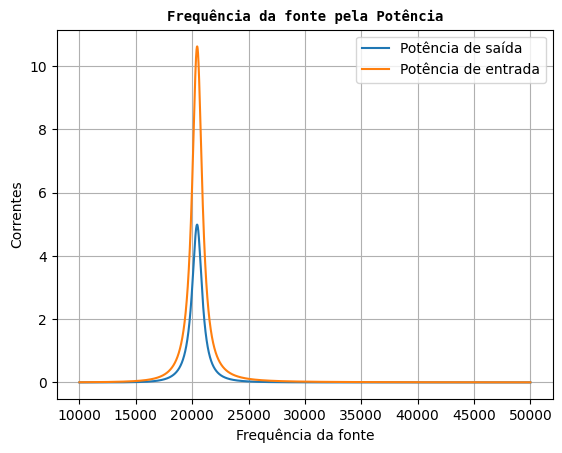

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Efici√™ncia m√°xima 0.47653309503013624


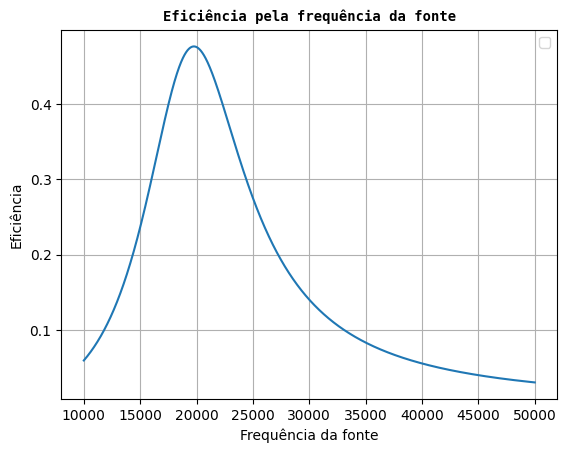

In [11]:
lista_f = np.linspace(10e3, 50e3, 100000) #lista de frequ√™nca das fontes
lista_Poti = [] #lista de pot√™ncias de entrada
lista_Pots = [] #Lista de pot√™ncias de sa√≠da
lista_n = [] #Lista de efici√™ncias para cada frequ√™ncia
#plt.figure(figsize = (15,10))  


for f in lista_f:
    I1, I2, V2, _ = parametros(2*np.pi*f,k,V_1,R_C, R_1, R_2, L_1, L_2, C_1, C_2) # correntes
    
    #c√°lulo da pot√™ncia total
    S1 = V_1*I1.conjugate()/2
    S2 = V2*I2.conjugate()/2
    
    #c√°lculo da pot√™ncia 
    POT1 = np.real(S1)  # Pot√™ncia efetiva (parte real) de S1
    POT2 = np.real(S2)  # Pot√™ncia efetiva (parte real) de S2
    
    #c√°lculo das Efici√™ncias
    n = (POT2/POT1) # em %
    
    #acrescentando nas respectivas listas
    lista_Poti.append(POT1)  # Adicionar POT1 √† lista de pot√™ncias de entrada
    lista_Pots.append(POT2)  # Adicionar POT2 √† lista de pot√™ncias de sa√≠da
    lista_n.append(n)

index = lista_Pots.index(max(lista_Pots))
freq = lista_f[index]
print('Pot√™ncia de entrada',max(lista_Poti))
print('Pot√™ncia de sa√≠da',max(lista_Pots))

print(f"Variando a frequ√™ncia, a pot√™ncia m√°xima de sa√≠da √©  f = {freq} Hz.")

plt.plot(lista_f, lista_Pots, label= "Pot√™ncia de sa√≠da")
plt.plot(lista_f, lista_Poti, label = "Pot√™ncia de entrada")
plt.xlabel("Frequ√™ncia da fonte")
plt.ylabel("Correntes")
plt.title("Frequ√™ncia da fonte pela Pot√™ncia",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()

print('Efici√™ncia m√°xima', max(lista_n))
plt.plot(lista_f, lista_n)
plt.xlabel("Frequ√™ncia da fonte")
plt.ylabel("Efici√™ncia")
plt.title("Efici√™ncia pela frequ√™ncia da fonte",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()


## Etapa 1 - Parte 6

##### Gr√°fico: Tens√£o na Carga x K (constante de acoplamento)

Utilizando a frequ√™ncia de resson√¢ncia natural do conjunto ùêøùê∂, que ficar√° fixa para diferentes valores de ùëò. A ideia, com a simula√ß√£o, √© identificar se existe um fator de acoplamento √≥timo, com o qual a tens√£o no secund√°rio √© m√°xima (e, por conseguinte, a pot√™ncia recebida tamb√©m ser√° m√°xima).

Para a constru√ß√£o deste gr√°fico foi feito uma lista de k's, e para cada k foi calculado a tens√£o Vcarga atrav√©s da f√≥rmula:

$$ Z = \frac {\frac{1}{j . \omega . C} . Rc} {Rc + \frac{1}{j . \omega . C} } $$

$$ Vc = I2 . Z $$


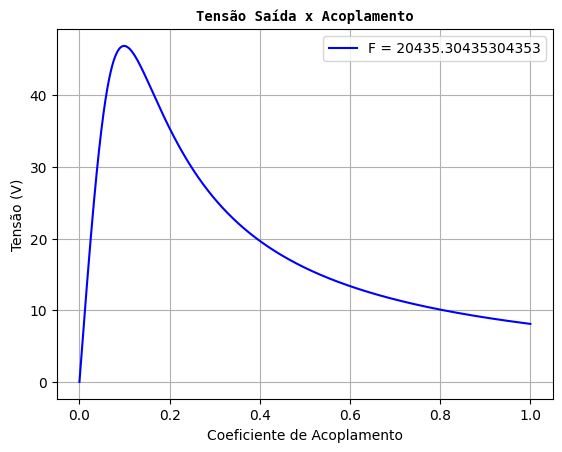

In [12]:
f = freq
lista_k = np.linspace(0,1,100000)
lista_v = []
for k in lista_k:
    I1,I2,V2,IC = parametros(2*math.pi*f,k)
    lista_v.append(abs(V2))

plt.plot(lista_k,np.abs(lista_v),'b',label = (f"F = {f}"))
plt.title('Tens√£o Sa√≠da x Acoplamento',fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.legend()
plt.ylabel("Tens√£o (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

### Tens√£o de sa√≠da pela dist√¢ncia

Pegando alguns valores de voltagem no oscilosc√≥pio e com aux√≠lio de uma trena, medimos as dist√¢ncias correspondentes para cada voltagem dada

<p align="center">
  <img src="img/dist.jpg" alt="Dist">
</p>


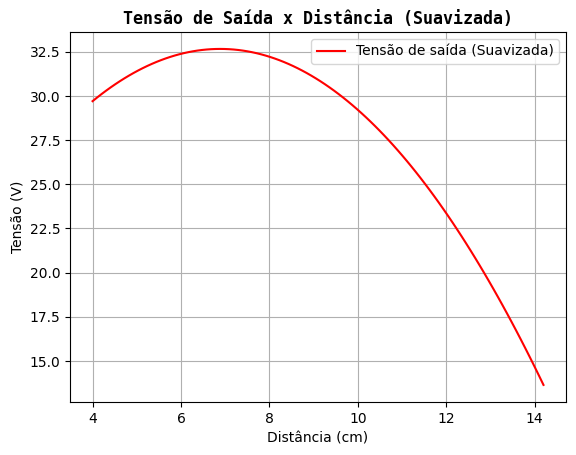

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Dados
volt = [28.5, 30.6, 35, 30, 25, 20.1, 15.2]
dist = [4, 4.4, 6.8, 9.5, 11.5, 12.2, 14.2]

# Ajuste polinomial de grau 2 (pode ajustar o grau conforme necess√°rio)
coefficients = np.polyfit(dist, volt, 2)
polynomial = np.poly1d(coefficients)

# Gera√ß√£o de pontos suavizados
smooth_dist = np.linspace(min(dist), max(dist), 100)
smooth_volt = polynomial(smooth_dist)

# Plotagem dos dados originais e curva suavizada
plt.plot(smooth_dist, smooth_volt, 'r', label="Tens√£o de sa√≠da (Suavizada)")

# Configura√ß√µes do gr√°fico
plt.title('Tens√£o de Sa√≠da x Dist√¢ncia (Suavizada)', fontsize=12, fontfamily='monospace', fontweight='semibold', color='k')
plt.legend(loc='best', prop={'size': 10})
plt.ylabel("Tens√£o (V)")
plt.xlabel("Dist√¢ncia (cm)")
plt.grid(True)

# Exibi√ß√£o do gr√°fico
plt.show()
